<a href="https://colab.research.google.com/github/LaraAyrolla/Python-Projects/blob/main/artificial-intelligence/AI-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from keras import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils

In [ ]:
dados = read_csv('/content/zoo.csv',sep=',')
dados

In [ ]:
X = dados.values[:,1:18]
Y = dados.values[:,0]


In [ ]:
Y

In [ ]:
X

In [ ]:
X = X.astype('float32')

In [ ]:
encoder = LabelEncoder()
encoder.fit(Y)
encoded_y = encoder.transform(Y)
Y2 = np_utils.to_categorical(encoded_y)
Y2

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(X,Y2,test_size=0.20)

In [ ]:
#rede neural
model = Sequential()
model.add(Dense(50,activation='tanh',kernel_initializer='he_normal',input_shape=(17,)))
model.add(Dense(20, activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(100,activation='softmax'))


In [ ]:
#compilacao do modelo
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(xtrain,ytrain, validation_data=(xtest,ytest),epochs=1000,batch_size=32,verbose=1)

Epoch 1/1000
3/3 [==============================] - 0s 38ms/step - loss: 0.5940 - accuracy: 0.6500 - val_loss: 26.6780 - val_accuracy: 0.0000e+00
Epoch 2/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.5912 - accuracy: 0.6500 - val_loss: 26.6955 - val_accuracy: 0.0000e+00
Epoch 3/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.5929 - accuracy: 0.6750 - val_loss: 26.7150 - val_accuracy: 0.0000e+00
Epoch 4/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.5924 - accuracy: 0.6500 - val_loss: 26.7258 - val_accuracy: 0.0000e+00
Epoch 5/1000
3/3 [==============================] - 0s 18ms/step - loss: 0.5911 - accuracy: 0.6625 - val_loss: 26.7377 - val_accuracy: 0.0000e+00
Epoch 6/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.5901 - accuracy: 0.6500 - val_loss: 26.7391 - val_accuracy: 0.0000e+00
Epoch 7/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.5928 - accuracy: 0.6750 - val_loss: 26.7353 - val

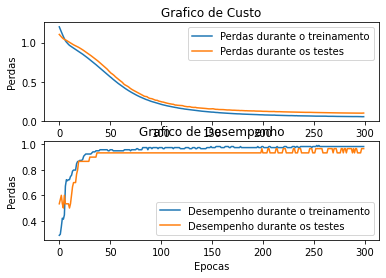

In [ ]:
plt.subplot(211)
plt.title('Grafico de Custo')
plt.plot(history.history['loss'],label= 'Perdas durante o treinamento')
plt.plot(history.history['val_loss'],label= 'Perdas durante os testes')
plt.xlabel('Epocas')
plt.ylabel('Perdas')
plt.legend()

plt.subplot(212)
plt.title('Grafico de Desempenho')
plt.plot(history.history['accuracy'],label= 'Desempenho durante o treinamento')
plt.plot(history.history['val_accuracy'],label= 'Desempenho durante os testes')
plt.xlabel('Epocas')
plt.ylabel('Perdas')
plt.legend()
plt.show()
